In [0]:
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
path = Path('/content/gdrive/My Drive/clouderizer/Fast.ai/data/chest_xray')

In [0]:
path.ls()

[PosixPath('/content/gdrive/My Drive/clouderizer/Fast.ai/data/chest_xray/val'),
 PosixPath('/content/gdrive/My Drive/clouderizer/Fast.ai/data/chest_xray/test'),
 PosixPath('/content/gdrive/My Drive/clouderizer/Fast.ai/data/chest_xray/train'),
 PosixPath('/content/gdrive/My Drive/clouderizer/Fast.ai/data/chest_xray/.DS_Store'),
 PosixPath('/content/gdrive/My Drive/clouderizer/Fast.ai/data/chest_xray/models'),
 PosixPath('/content/gdrive/My Drive/clouderizer/Fast.ai/data/chest_xray/trained_model32.pkl')]

In [0]:
ImageDataBunch?

In [0]:
data = ImageDataBunch.from_folder(path, train='train', test='test', valid_pct=0.2, ds_tfms=get_transforms(),size=128, bs=64).normalize(imagenet_stats)

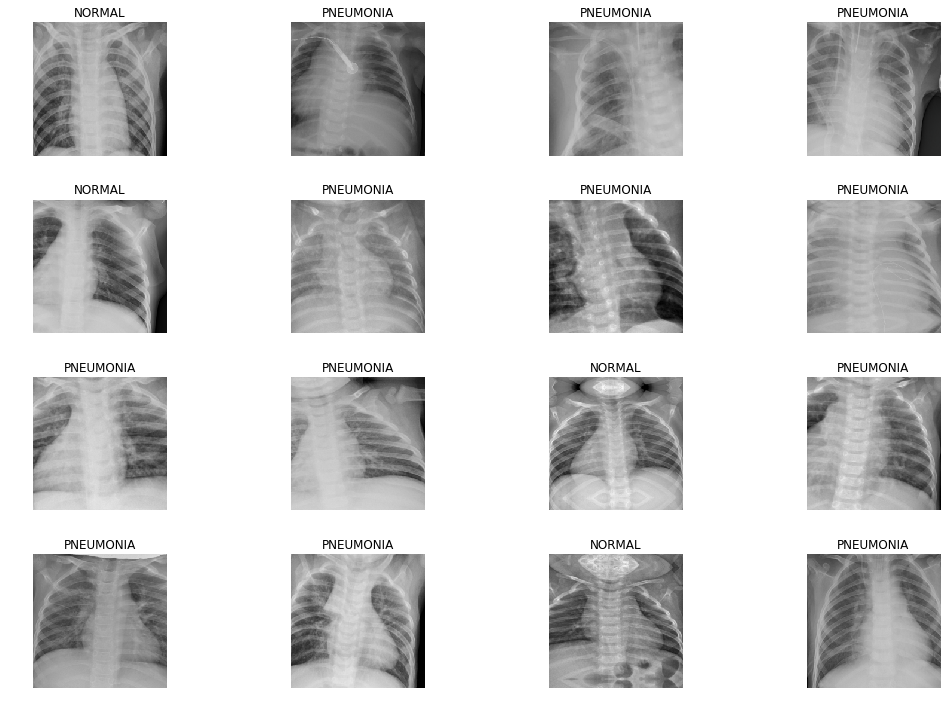

In [0]:
data.show_batch(4, figsize=(15,10))

In [6]:
data.c, len(data.train_ds), len(data.valid_ds), len(data.test_ds)

(2, 4704, 1175, 624)

In [0]:
learn = cnn_learner(data,models.resnet34,metrics=[accuracy,Recall(average='macro')])

In [8]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,recall,time
0,0.407518,0.285709,0.906383,0.897408,02:57
1,0.272873,0.204897,0.931915,0.908973,02:53
2,0.214025,0.224840,0.918298,0.918683,02:56
3,0.180272,0.193490,0.926809,0.917737,02:51
4,0.175457,0.183365,0.932766,0.922836,02:54


In [0]:
learn.save('first_model-xray')

We trained the model on images size 128, now for the second run we will resize them to 256 and run 5 more epochs. This method was learned from Jeremy Howard in the FastAI MOOC.

In [0]:
data = ImageDataBunch.from_folder(path, train='train', test='test', valid_pct=0.2, ds_tfms=get_transforms(),size=256, bs=64).normalize(imagenet_stats)

In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


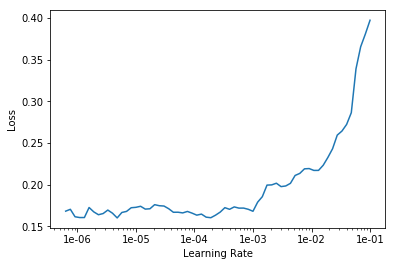

In [12]:
learn.lr_find()
learn.recorder.plot()

In [13]:
lr = .01
learn.fit_one_cycle(5, slice(1e-5, lr/5))

epoch,train_loss,valid_loss,accuracy,recall,time
0,0.144852,0.212904,0.927660,0.939354,02:55
1,0.145685,0.125268,0.952340,0.955888,02:54
2,0.110256,0.094677,0.963404,0.953330,02:55
3,0.091468,0.094612,0.972766,0.968463,02:53
4,0.074571,0.102083,0.967660,0.969473,02:55


In [14]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

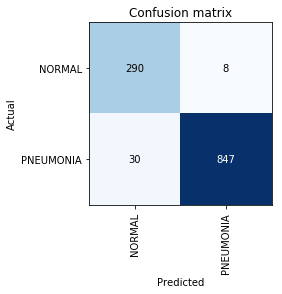

In [15]:
interp.plot_confusion_matrix()